In [1]:
# fmt: off
COORDS = [
    (456, 320),  # location 0 - the depot
    (228, 0),    # location 1
    (912, 0),    # location 2
    (0, 80),     # location 3
    (114, 80),   # location 4
    (570, 160),  # location 5
    (798, 160),  # location 6
    (342, 240),  # location 7
    (684, 240),  # location 8
    (570, 400),  # location 9
    (912, 400),  # location 10
    (114, 480),  # location 11
    (228, 480),  # location 12
    (342, 560),  # location 13
    (684, 560),  # location 14
    (0, 640),    # location 15
    (798, 640),  # location 16
]
DEMANDS = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
# fmt: on

In [2]:
from pyvrp import Model

m = Model()
m.add_vehicle_type(4, capacity=15)
depot = m.add_depot(x=COORDS[0][0], y=COORDS[0][1])
clients = [
    m.add_client(x=COORDS[idx][0], y=COORDS[idx][1], delivery=DEMANDS[idx])
    for idx in range(1, len(COORDS))
]

for frm in m.locations:
    for to in m.locations:
        distance = abs(frm.x - to.x) + abs(frm.y - to.y)  # Manhattan
        m.add_edge(frm, to, distance=int(distance))

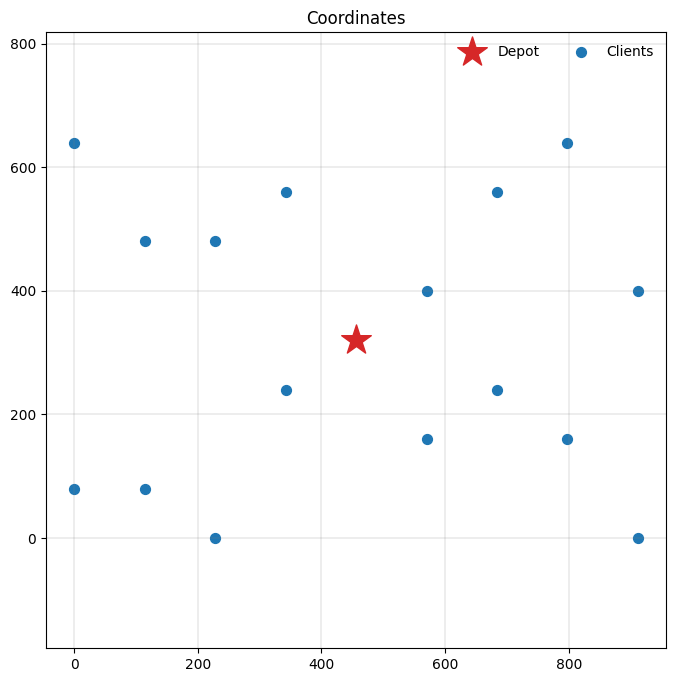

In [3]:
import matplotlib.pyplot as plt

from pyvrp.plotting import plot_coordinates

_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(m.data(), ax=ax)

In [4]:
from pyvrp.stop import MaxRuntime

res = m.solve(stop=MaxRuntime(1), display=True)  # one second

PyVRP v0.12.2

Solving an instance with:
    1 depot
    16 clients
    4 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best

Search terminated in 1.00s after 1979 iterations.
Best-found solution has cost 6208.

Solution results
    # routes: 4
     # trips: 4
   # clients: 16
   objective: 6208
    distance: 6208
    duration: 0
# iterations: 1979
    run-time: 1.00 seconds


In [5]:
print(res)

Solution results
    # routes: 4
     # trips: 4
   # clients: 16
   objective: 6208
    distance: 6208
    duration: 0
# iterations: 1979
    run-time: 1.00 seconds

Routes
------
Route #1: 9 14 16 10
Route #2: 8 6 2 5
Route #3: 12 11 15 13
Route #4: 1 4 3 7



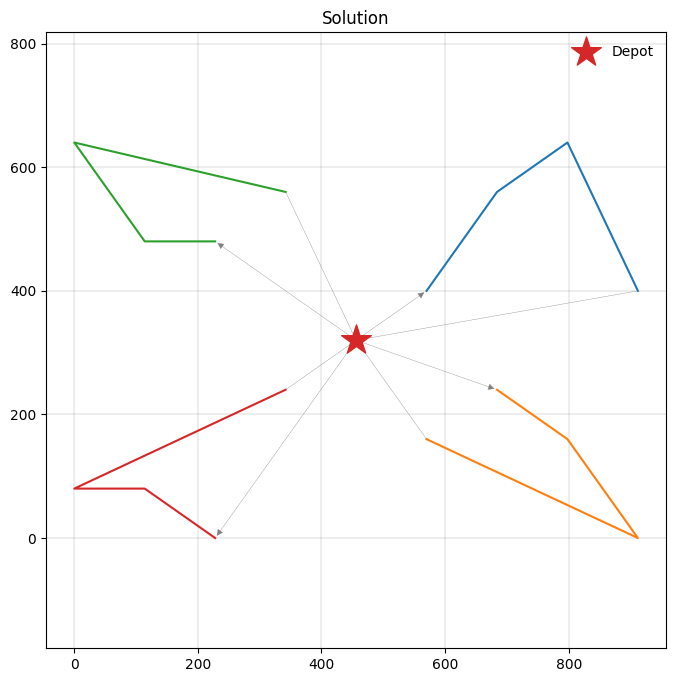

In [6]:
from pyvrp.plotting import plot_solution

_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, m.data(), ax=ax)

In [7]:
# fmt: off
DURATION_MATRIX = [
        [0, 6, 9, 8, 7, 3, 6, 2, 3, 2, 6, 6, 4, 4, 5, 9, 7],
        [6, 0, 8, 3, 2, 6, 8, 4, 8, 8, 13, 7, 5, 8, 12, 10, 14],
        [9, 8, 0, 11, 10, 6, 3, 9, 5, 8, 4, 15, 14, 13, 9, 18, 9],
        [8, 3, 11, 0, 1, 7, 10, 6, 10, 10, 14, 6, 7, 9, 14, 6, 16],
        [7, 2, 10, 1, 0, 6, 9, 4, 8, 9, 13, 4, 6, 8, 12, 8, 14],
        [3, 6, 6, 7, 6, 0, 2, 3, 2, 2, 7, 9, 7, 7, 6, 12, 8],
        [6, 8, 3, 10, 9, 2, 0, 6, 2, 5, 4, 12, 10, 10, 6, 15, 5],
        [2, 4, 9, 6, 4, 3, 6, 0, 4, 4, 8, 5, 4, 3, 7, 8, 10],
        [3, 8, 5, 10, 8, 2, 2, 4, 0, 3, 4, 9, 8, 7, 3, 13, 6],
        [2, 8, 8, 10, 9, 2, 5, 4, 3, 0, 4, 6, 5, 4, 3, 9, 5],
        [6, 13, 4, 14, 13, 7, 4, 8, 4, 4, 0, 10, 9, 8, 4, 13, 4],
        [6, 7, 15, 6, 4, 9, 12, 5, 9, 6, 10, 0, 1, 3, 7, 3, 10],
        [4, 5, 14, 7, 6, 7, 10, 4, 8, 5, 9, 1, 0, 2, 6, 4, 8],
        [4, 8, 13, 9, 8, 7, 10, 3, 7, 4, 8, 3, 2, 0, 4, 5, 6],
        [5, 12, 9, 14, 12, 6, 6, 7, 3, 3, 4, 7, 6, 4, 0, 9, 2],
        [9, 10, 18, 6, 8, 12, 15, 8, 13, 9, 13, 3, 4, 5, 9, 0, 9],
        [7, 14, 9, 16, 14, 8, 5, 10, 6, 5, 4, 10, 8, 6, 2, 9, 0],
]
TIME_WINDOWS = [
        (0, 999),  # location 0 - the depot (modified to be unrestricted)
        (7, 12),   # location 1
        (10, 15),  # location 2
        (16, 18),  # location 3
        (10, 13),  # location 4
        (0, 5),    # location 5
        (5, 10),   # location 6
        (0, 4),    # location 7
        (5, 10),   # location 8
        (0, 3),    # location 9
        (10, 16),  # location 10
        (10, 15),  # location 11
        (0, 5),    # location 12
        (5, 10),   # location 13
        (7, 8),    # location 14
        (10, 15),  # location 15
        (11, 15),  # location 16
]
# fmt: on

In [8]:
m = Model()
m.add_vehicle_type(
    4,
    shift_duration=30,
    tw_early=TIME_WINDOWS[0][0],
    tw_late=TIME_WINDOWS[0][1],
)

depot = m.add_depot(
    x=COORDS[0][0],
    y=COORDS[0][1],
    tw_early=TIME_WINDOWS[0][0],
    tw_late=TIME_WINDOWS[0][1],
)
clients = [
    m.add_client(
        x=COORDS[idx][0],
        y=COORDS[idx][1],
        tw_early=TIME_WINDOWS[idx][0],
        tw_late=TIME_WINDOWS[idx][1],
    )
    for idx in range(1, len(COORDS))
]

for frm_idx, frm in enumerate(m.locations):
    for to_idx, to in enumerate(m.locations):
        distance = abs(frm.x - to.x) + abs(frm.y - to.y)  # Manhattan
        duration = DURATION_MATRIX[frm_idx][to_idx]
        m.add_edge(frm, to, distance=int(distance), duration=duration)

In [9]:
res = m.solve(stop=MaxRuntime(1), display=False)  # one second
print(res)

Solution results
    # routes: 4
     # trips: 4
   # clients: 16
   objective: 6528
    distance: 6528
    duration: 79
# iterations: 1415
    run-time: 1.00 seconds

Routes
------
Route #1: 7 1 4 3
Route #2: 12 13 15 11
Route #3: 5 8 6 2 10
Route #4: 9 14 16



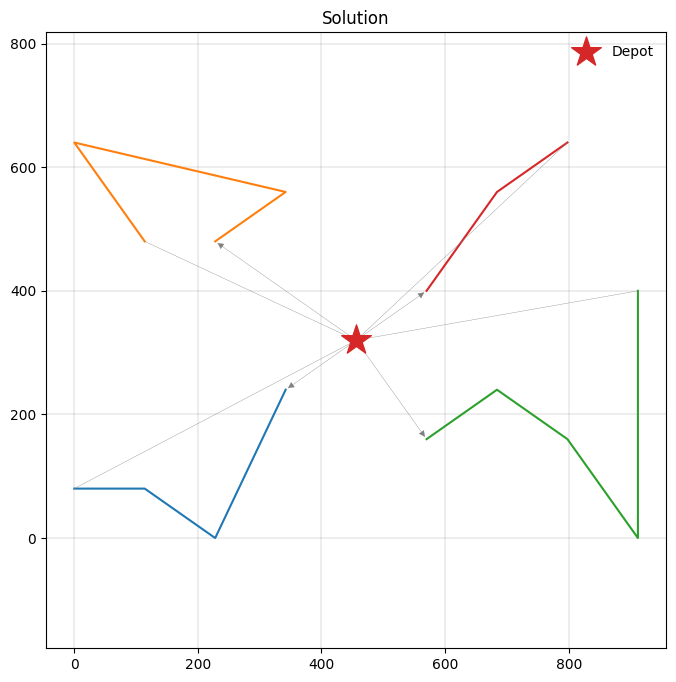

In [10]:
_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, m.data(), ax=ax)

In [11]:
# fmt: off
TIME_WINDOWS = [
    (0, 999),  # location 0 - a depot (modified to be unrestricted)
    (0, 999),  # location 1 - a depot (modified to be unrestricted)
    (10, 15),  # location 2
    (16, 18),  # location 3
    (10, 13),  # location 4
    (0, 5),    # location 5
    (5, 10),   # location 6
    (0, 4),    # location 7
    (5, 10),   # location 8
    (0, 3),    # location 9
    (10, 16),  # location 10
    (10, 15),  # location 11
    (0, 5),    # location 12
    (5, 10),   # location 13
    (7, 8),    # location 14
    (10, 15),  # location 15
    (11, 15),  # location 16
]
# fmt: on

In [12]:
m = Model()

for idx in range(2):
    depot = m.add_depot(x=COORDS[idx][0], y=COORDS[idx][1])

    # Two vehicles at each depot, with 30 maximum duration.
    m.add_vehicle_type(
        2,
        start_depot=depot,
        end_depot=depot,
        shift_duration=30,
        tw_early=TIME_WINDOWS[idx][0],
        tw_late=TIME_WINDOWS[idx][1],
    )

for idx in range(2, len(COORDS)):
    m.add_client(
        x=COORDS[idx][0],
        y=COORDS[idx][1],
        tw_early=TIME_WINDOWS[idx][0],
        tw_late=TIME_WINDOWS[idx][1],
    )

for frm_idx, frm in enumerate(m.locations):
    for to_idx, to in enumerate(m.locations):
        distance = abs(frm.x - to.x) + abs(frm.y - to.y)  # Manhattan
        duration = DURATION_MATRIX[frm_idx][to_idx]
        m.add_edge(frm, to, distance=int(distance), duration=duration)

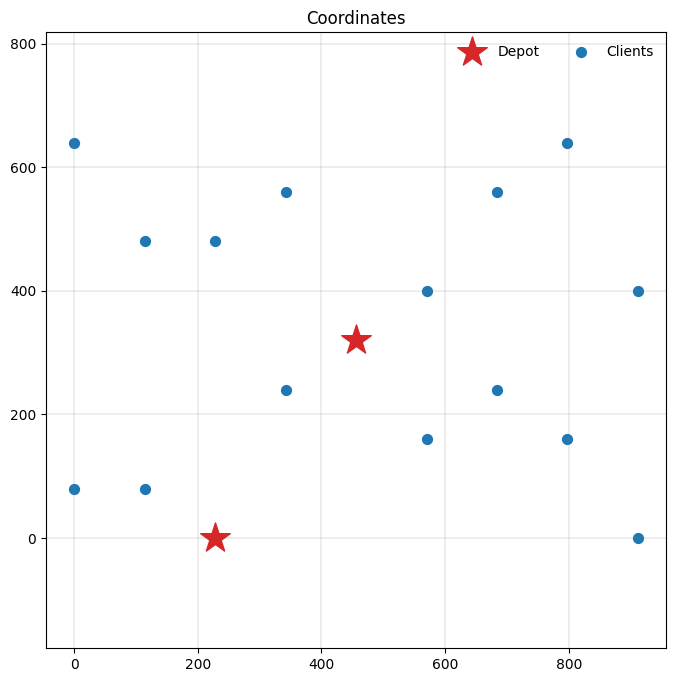

In [13]:
_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(m.data(), ax=ax)

In [14]:
res = m.solve(stop=MaxRuntime(1), display=False)  # one second
print(res)

Solution results
    # routes: 4
     # trips: 4
   # clients: 15
   objective: 6004
    distance: 6004
    duration: 69
# iterations: 1617
    run-time: 1.00 seconds

Routes
------
Route #1: 9 14 16
Route #2: 7 5 8 6 2 10
Route #3: 4 3
Route #4: 12 13 15 11



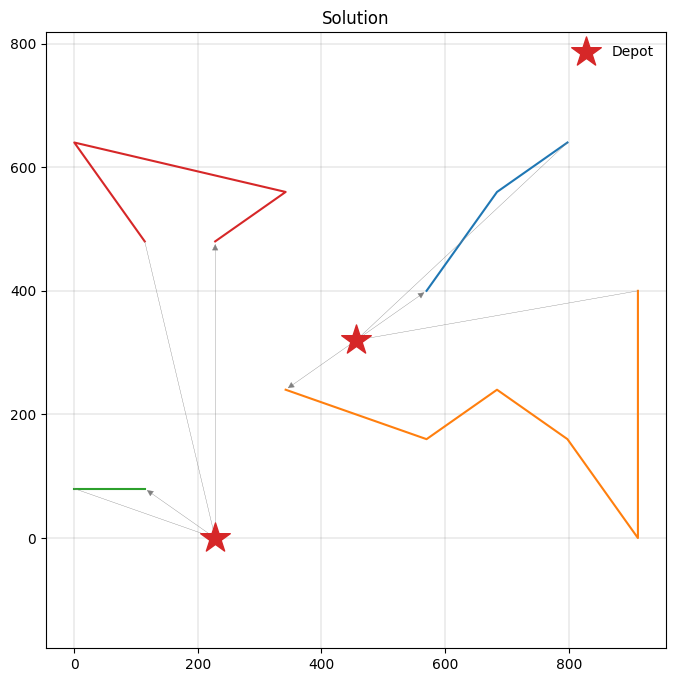

In [15]:
_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, m.data(), ax=ax)